# 📊 Synthetic Data Visualization (v3)

This notebook provides a comprehensive visual and statistical analysis of synthetic energy datasets.

### Included:
- Hourly usage profiles
- Daily trends
- Temperature effects
- Anomaly visualization
- Carbon emissions
- Statistical summaries
- All plots are saved to `/plots/` folder


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

# Plotting style and directory
sns.set(style='whitegrid')
plot_dir = Path("plots")
plot_dir.mkdir(exist_ok=True)


Load Datasets via Utility Loader

In [23]:
import sys
sys.path.append("../src")

from utils.loader import load_synthetic_dataset

# Load datasets
res = load_synthetic_dataset("synthetic_energy_residential_365d.csv")
com = load_synthetic_dataset("synthetic_energy_commercial_365d.csv")
mix = load_synthetic_dataset("synthetic_energy_mixed_365d.csv")

# Combine into one DataFrame
combined = pd.concat([res, com, mix], ignore_index=True)
combined['date'] = combined['timestamp'].dt.date
combined['hour'] = combined['timestamp'].dt.hour


Daily Average Energy Plot

C:\Users\Mantas\AppData\Local\Temp\ipykernel_30624\895287942.py:11: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Mantas\AppData\Local\Temp\ipykernel_30624\895287942.py:12: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) Arial.
  plt.savefig(plot_dir / "hourly_usage_profile.png", dpi=300)
c:\Users\Mantas\anaconda3\envs\energy_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


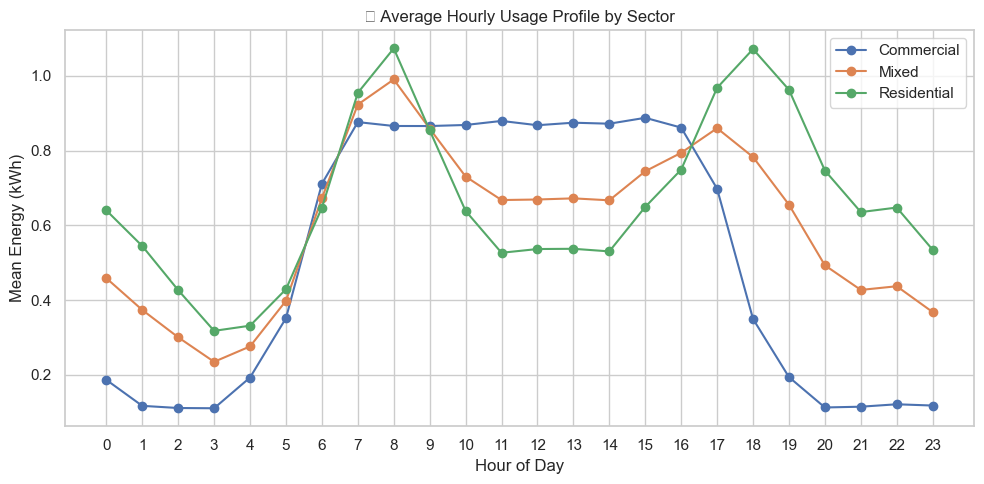

In [24]:
plt.figure(figsize=(10, 5))
for label, group in combined.groupby("sector"):
    hourly = group.groupby('hour')['energy_kWh'].mean()
    plt.plot(hourly.index, hourly.values, label=label, marker='o')
plt.xticks(range(24))
plt.xlabel("Hour of Day")
plt.ylabel("Mean Energy (kWh)")
plt.title("🔁 Average Hourly Usage Profile by Sector")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(plot_dir / "hourly_usage_profile.png", dpi=300)
plt.show()


Boxplot of Energy by Sector

C:\Users\Mantas\AppData\Local\Temp\ipykernel_30624\156643285.py:7: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Mantas\AppData\Local\Temp\ipykernel_30624\156643285.py:8: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.savefig(plot_dir / "boxplot_energy_by_sector.png", dpi=300)
c:\Users\Mantas\anaconda3\envs\energy_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


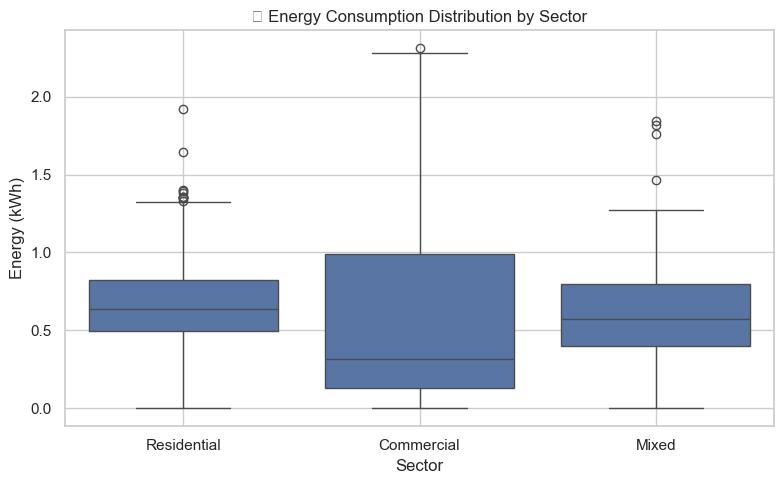

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=combined, x="sector", y="energy_kWh")
plt.title("📦 Energy Consumption Distribution by Sector")
plt.ylabel("Energy (kWh)")
plt.xlabel("Sector")
plt.grid(True)
plt.tight_layout()
plt.savefig(plot_dir / "boxplot_energy_by_sector.png", dpi=300)
plt.show()


Temperature vs. Energy Scatter

C:\Users\Mantas\AppData\Local\Temp\ipykernel_30624\3202089692.py:7: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Mantas\AppData\Local\Temp\ipykernel_30624\3202089692.py:7: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Mantas\AppData\Local\Temp\ipykernel_30624\3202089692.py:8: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  plt.savefig(plot_dir / "temperature_vs_energy.png", dpi=300)
C:\Users\Mantas\AppData\Local\Temp\ipykernel_30624\3202089692.py:8: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.savefig(plot_dir / "temperature_vs_energy.png", dpi=300)
c:\Users\Mantas\anaconda3\envs\energy_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Mantas\anaconda3\envs\energy_env\lib\si

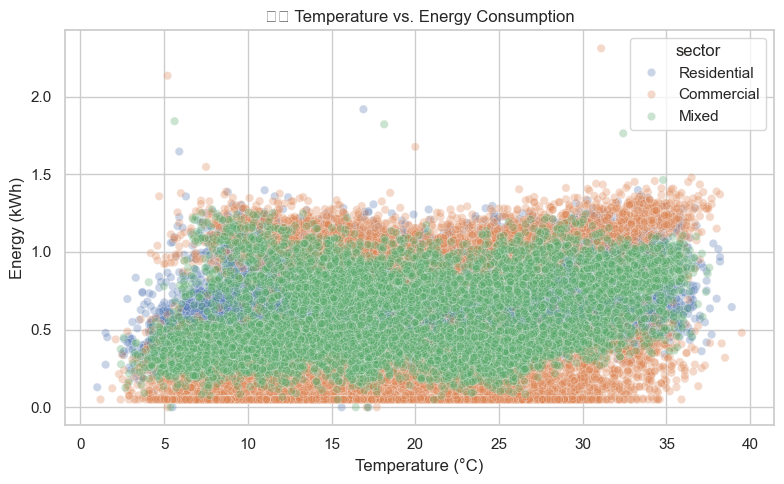

In [26]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=combined, x="temperature_C", y="energy_kWh", hue="sector", alpha=0.3)
plt.title("🌡️ Temperature vs. Energy Consumption")
plt.xlabel("Temperature (°C)")
plt.ylabel("Energy (kWh)")
plt.grid(True)
plt.tight_layout()
plt.savefig(plot_dir / "temperature_vs_energy.png", dpi=300)
plt.show()


Carbon Footprint Over Time

C:\Users\Mantas\AppData\Local\Temp\ipykernel_30624\1962150485.py:9: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Mantas\AppData\Local\Temp\ipykernel_30624\1962150485.py:10: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) Arial.
  plt.savefig(plot_dir / "carbon_by_sector.png", dpi=300)
c:\Users\Mantas\anaconda3\envs\energy_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


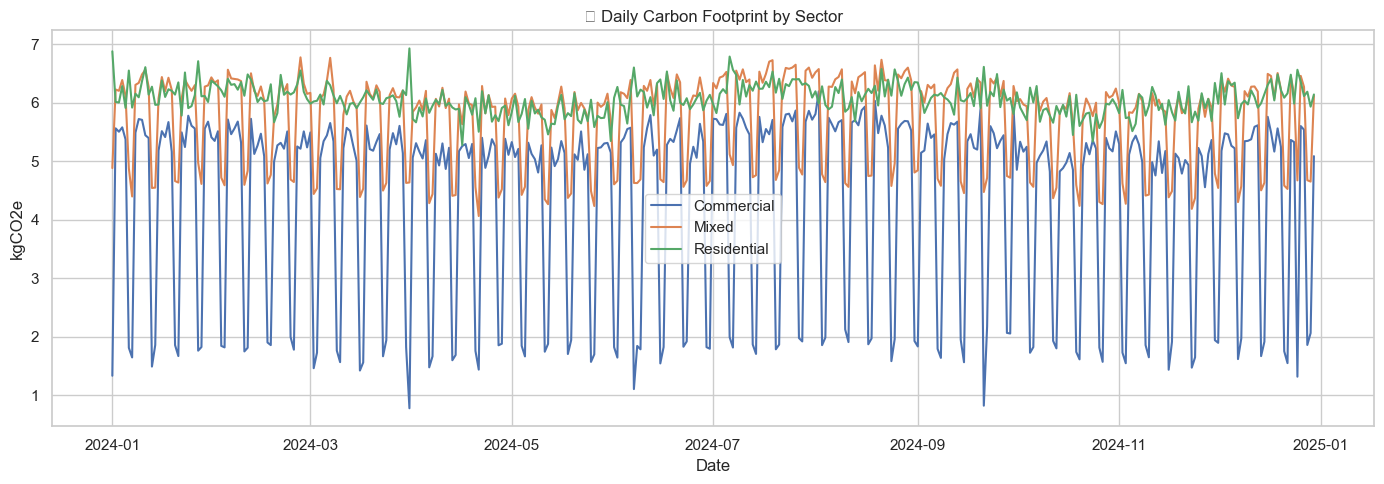

In [27]:
plt.figure(figsize=(14, 5))
for label, group in combined.groupby("sector"):
    group_daily = group.groupby(group['timestamp'].dt.date)["carbon_kgCO2e"].sum()
    plt.plot(group_daily.index, group_daily.values, label=label)
plt.title("🧮 Daily Carbon Footprint by Sector")
plt.ylabel("kgCO2e")
plt.xlabel("Date")
plt.legend()
plt.tight_layout()
plt.savefig(plot_dir / "carbon_by_sector.png", dpi=300)
plt.show()


Anomaly Count per Sector

C:\Users\Mantas\AppData\Local\Temp\ipykernel_30624\3303536147.py:5: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Mantas\AppData\Local\Temp\ipykernel_30624\3303536147.py:5: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Mantas\AppData\Local\Temp\ipykernel_30624\3303536147.py:6: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.
  plt.savefig(plot_dir / "anomaly_count_per_sector.png", dpi=300)
C:\Users\Mantas\AppData\Local\Temp\ipykernel_30624\3303536147.py:6: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.savefig(plot_dir / "anomaly_count_per_sector.png", dpi=300)
c:\Users\Mantas\anaconda3\envs\energy_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Mantas\anaconda3\envs\energy_env\lib

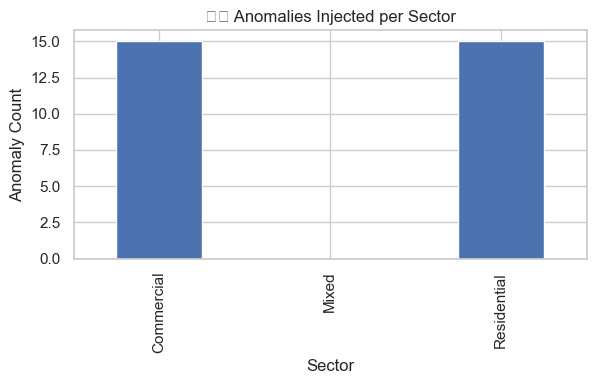

In [28]:
anomaly_counts = combined.groupby("sector")["anomaly_flag"].sum()
anomaly_counts.plot(kind="bar", figsize=(6,4), title="⚠️ Anomalies Injected per Sector")
plt.ylabel("Anomaly Count")
plt.xlabel("Sector")
plt.tight_layout()
plt.savefig(plot_dir / "anomaly_count_per_sector.png", dpi=300)
plt.show()


Summary Statistics Table

In [29]:
# === Summary Statistics ===
combined.groupby("sector")[["energy_kWh", "temperature_C", "carbon_kgCO2e"]].describe().round(2)


energy_kWh                                          temperature_C  \
                 count  mean   std  min   25%   50%   75%   max         count   
sector                                                                          
Commercial      8760.0  0.51  0.44  0.0  0.13  0.32  0.99  2.31        8760.0   
Mixed           8760.0  0.60  0.25  0.0  0.40  0.58  0.80  1.84        8760.0   
Residential     8760.0  0.66  0.24  0.0  0.49  0.63  0.82  1.92        8760.0   

                    ...               carbon_kgCO2e                          \
              mean  ...    75%    max         count  mean   std   min   25%   
sector              ...                                                       
Commercial   19.73  ...  26.10  39.50        8760.0  0.18  0.15  0.02  0.05   
Mixed        19.73  ...  26.14  37.56        8760.0  0.24  0.10  0.00  0.16   
Residential  19.72  ...  26.20  38.90        8760.0  0.25  0.10  0.02  0.18   

                               
              50%   75%   max  
sector                         
Commercial   0.12  0.32  0.61  
Mixed        0.23  0.32  0.73  
Residential  0.23  0.32  0.55  

[3 rows x 24 columns]